# EDA

In [1]:
import cudf
import cupy as cp
import os
import plotly.graph_objects as go

In [112]:
df = cudf.read_csv('aggregated.csv')

# Initial Cleaning

In [120]:
df.sample(5)

,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,H2O Air (mmol/mol),Licor Atm Pressure (hPa),Licor Temp (C),...,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2,pH_SW,pH_QF
4933,8/24/13,12:17,436.7,2,13.93,396.1,2,13.03,1019.2,28.8,...,442.9,401.4,427.1,387.0,40.1,428.4,388.2,40.2,8.002,2.0
3399,2/21/13,12:17,400.8,2,6.58,393.5,2,6.15,1020.1,25.8,...,403.4,396.0,391.7,384.5,7.2,392.9,385.7,7.3,8.048,2.0
16439,1/18/2018,21:17,418.2,2,15.30,400.9,2,13.46,1014.8,27.6,...,424.7,406.3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000,5.0
5644,11/21/13,9:17,443.2,2,10.92,414.3,2,9.90,1017.6,28.3,...,448.1,418.4,431.6,403.0,28.6,432.9,404.2,28.7,7.996,2.0
6674,5/1/2009,18:17,438.3,2,4.59,394.9,2,3.98,1015.4,29.4,...,440.3,396.4,423.7,381.5,42.2,425.0,382.6,42.3,NaN,NaN


Drop Mooring name, Latitude and Longitude since this refers to the buoy mooring, and this data is from a single mooring

In [114]:
df['Mooring Name'].unique()

0    LA_PARGUERA_67W_18N
Name: Mooring Name, dtype: object

In [115]:
df = df.drop(['Mooring Name', 'Latitude', 'Longitude'], axis=1)

In [116]:
df.columns

Index(['Date', 'Time', 'xCO2 SW (wet) (umol/mol)', 'CO2 SW QF',
       'H2O SW (mmol/mol)', 'xCO2 Air (wet) (umol/mol)', 'CO2 Air QF',
       'H2O Air (mmol/mol)', 'Licor Atm Pressure (hPa)', 'Licor Temp (C)',
       'MAPCO2 %O2', 'SST (C)', 'Salinity', 'xCO2 SW (dry) (umol/mol)',
       'xCO2 Air (dry) (umol/mol)', 'fCO2 SW (sat) uatm',
       'fCO2 Air (sat) uatm', 'dfCO2', 'pCO2 SW (sat) uatm',
       'pCO2 Air (sat) uatm', 'dpCO2', 'pH_SW', 'pH_QF'],
      dtype='object')

In [117]:
df = df.to_pandas()

In [121]:
def fix_date(date):
    m, d, y = date.split('/')
    return y[-2:]+ '/' + m + '/' + d

In [122]:
df['Date'] = df.apply(lambda row: fix_date(row['Date']), axis=1)

In [123]:
df['Date'] = pd.to_datetime(df['Date'], format='%y/%m/%d')

In [124]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd


stats = tfdv.generate_statistics_from_dataframe(df)
tfdv.visualize_statistics(stats)

## Initial Visualisation

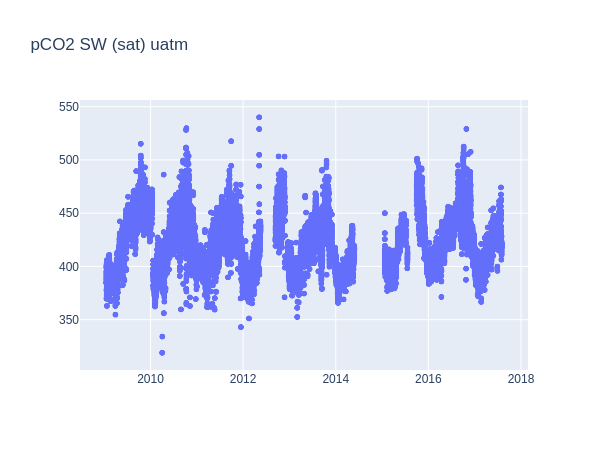

In [134]:
df_sub = df[['Date', 'pCO2 SW (sat) uatm']]
df_sub = df_sub[df_sub['pCO2 SW (sat) uatm'] >= 0]

fig = go.Figure(data=[go.Scattergl(x=df_sub.Date, y=df_sub['pCO2 SW (sat) uatm'], mode='markers', name='pCO2 SW (sat) uatm')])
fig.update_layout(
    title='pCO2 SW (sat) uatm'    
)





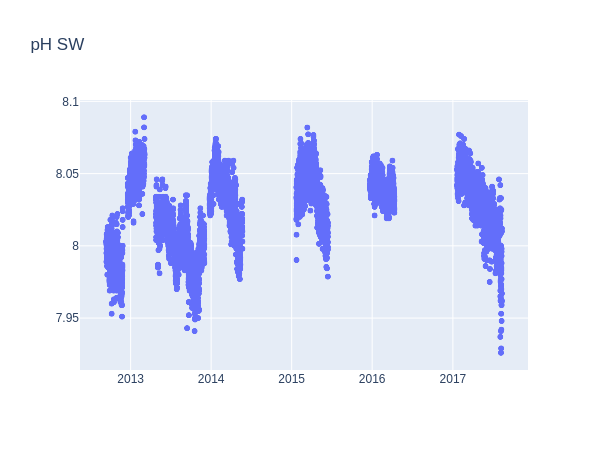

In [151]:
df_sub = df[['Date', 'xCO2 SW (wet) (umol/mol)']]
df_sub = df[df['xCO2 SW (wet) (umol/mol)'] >= 0]
fig_xc02wet = go.Figure(data=go.Scattergl(x=df_sub.Date, y=df_sub['xCO2 SW (wet) (umol/mol)'], mode='markers', name=''))
fig_xc02wet.update_layout(title='xCO2 SW (wet) (umol/mol)')

# df_sub = df[df['xCO2 Air (wet) (umol/mol)'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub['xCO2 Air (wet) (umol/mol)'], mode='markers', name=''))
# df_sub = df[df['SST (C)'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub['SST (C)'], mode='markers', name=''))
df_sub = df[df['Salinity'] >= 0]
fig_salinity = go.Figure(go.Scattergl(x=df_sub.Date, y=df_sub['Salinity'], mode='markers'))
fig_salinity.update_layout(title='Salinity')
# df_sub = df[df['xCO2 SW (dry) (umol/mol)'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
# df_sub = df[df['xCO2 Air (dry) (umol/mo]l)'>=0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
# df_sub = df[df['fCO2 SW (sat) uatm'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
# df_sub = df[df['fCO2 Air (sat) uatm'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
# df_sub = df[df['dfCO2'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
df_sub = df[df['pCO2 SW (sat) uatm'] >= 0]
fig_pC02SW = go.Figure(go.Scattergl(x=df_sub.Date, y=df_sub['pCO2 SW (sat) uatm'], mode='markers', name=''))
fig_pC02SW.update_layout(title='pC02 SW')

# df_sub = df[df['pCO2 Air (sat) uatm'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))
# df_sub = df[df['dpCO2'] >= 0]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))


df_sub = df[df['pH_SW'] >= 0]
fig_pHSW = go.Figure(go.Scattergl(x=df_sub.Date, y=df_sub['pH_SW'], mode='markers'))
fig_pHSW.update_layout(title='pH SW')
# df_sub = df[df['pH_QF' >= 0]]
# fig.add_trace(go.Scattergl(x=df_sub.Date, y=df_sub[''], mode='markers', name=''))

In [155]:
import dash

from jupyter_dash import JupyterDash

from IPython.display import display, HTML
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
### Start the webapp

app = JupyterDash(__name__, 
                  external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Graph(figure=fig),
    dcc.Graph(figure=fig_xc02wet),
    dcc.Graph(figure=fig_salinity),
    dcc.Graph(figure=fig_pC02SW),
    dcc.Graph(figure=fig_pHSW) 
    
    
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash app running on http://127.0.0.1:8050/
